# Bode plot for first-order RC lowpass filter

## The problem

Consider the first-order lowpass filter circuit below:

![](figures/circuitrclowpass.png)

The input signal $x(t)$ is the source voltage and the output $y(t)$ is the voltage across the capacitor.

Using standard techniques the governing differential equation is found to be
$$y(t) + RC \frac{dy(t)}{dt} = x(t).$$
Note that the actual values of $R$ are $C$ don't matter, just the value of the product $RC$.  Bear in mind though, if a 1F capacitor exists it will be huge and cost gigadollars, and a 1$\Omega$ resistor is not common.

In this course we will see (or might already have seen) that the RC circuit has a transfer function
$$H(\omega) = \frac{1/RC}{1/RC + j \omega}.$$
This system has a real impulse response so $H(-\omega) = H^\ast(\omega)$.  The exact analytical form for the steady-state response to the input signal $x(t) = \cos(\omega t)$ is quite easily shown to be
$$y(t) = |H(\omega)| \cos(\omega t + \angle H(\omega)).$$
This is all you need to know for now, and the details are explored in another workbook.

This workbook investigates ways of visualising the transfer function $H(\omega)$.  This is not trivial because, even though $\omega$ is real, $H(\omega)$ takes on complex values.  Thus we need to plot both magnitude and phase as functions of frequency.  Also, it turns out that expressing both domain and range on logarithmic axes makes it much easier to characterise the behaviour of the system.  This leads to the conventional *Bode plot*.

## Simple visualisation of frequency response

The simple way to visualise $H(\omega)$ is to choose a set of frequencies of interest and store them in an array `wv`.  We can then evaluate $H(\omega)$ at these points, storing the results in another array `Hv`.  Note that since `Hv` will be complex we cannot just plot it.  Instead for any $\omega$ we can write the frequency response in magnitude-phase form
$$H(\omega) = |H(\omega)| e^{j \angle H(\omega)}$$
and make seperate plots of $|H(\omega)|$ and $\angle H(\omega)$.

<IPython.core.display.Javascript object>


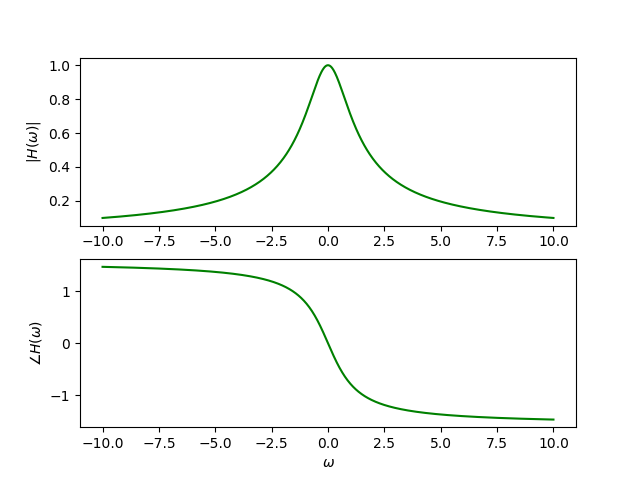

In [2]:
# Two-sided Bode plot linear-linear 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Frequency response
RC = 1;
wv = np.linspace(-10, 10, 1000);
Hv = (1/RC)/((1/RC)+1j*wv);

# Display
fh, ax = plt.subplots(2);
ax[0].plot(wv, np.abs(Hv), c='g');  ax[0].set_ylabel(r'$|H(\omega)|$');
ax[1].plot(wv, np.angle(Hv), c='g');  ax[1].set_ylabel(r'$\angle H(\omega)$');
plt.xlabel('$\omega$');

It is difficult from the plots above to see the effect of the $RC$ value for the circuit.  If you increase it the magnitude plot for example become more "peaky", but the effect is hard to characterise.  

We note firstly that the condition $H(-\omega) = H^\ast(\omega)$ means that the magnitude $|H(\omega)|$ is always even and the phase $\angle H(\omega)$ is always odd.  We may as well therefore only plot them for positive frequencies $\omega > 0$ - all the useful information is still available.

Secondly, the magnitude plot above is linear in frequency $\omega$ and linear in the gain $|H(\omega)|$.  A log-log plot turns out to be more useful.  We can redo the plots above, but this time with the gain in decibels $G_{dB}(\omega) = 10 \log_{10} |H(\omega)|^2$ plotted against logarithmic frequency $\log_{10} \omega$:

<IPython.core.display.Javascript object>


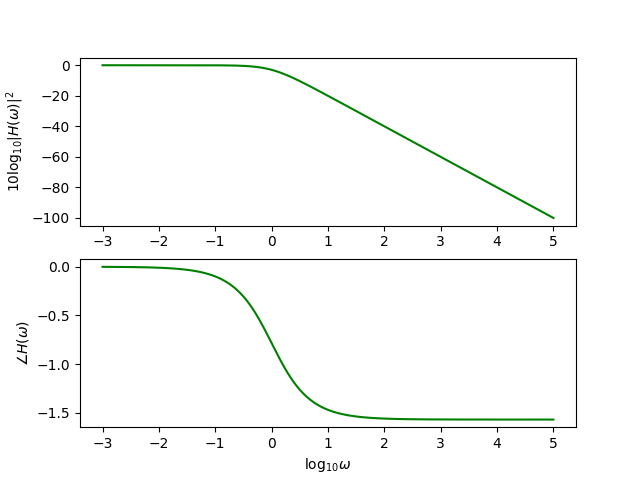

In [3]:
# One-sided Bode plot log-log
lwv = np.linspace(-3, 5, 1000);  # linear points in log space
wv = 10**lwv;  # actual frequencies
Hv = (1/RC)/((1/RC)+1j*wv);  # frequency response
dbHv = 10*np.log10(np.abs(Hv)**2);  # magnitude response in dB

fh, ax = plt.subplots(2);
ax[0].plot(lwv, dbHv, c='g');  ax[0].set_ylabel('$10 \log_{10} |H(\omega)|^2$');
ax[1].plot(lwv, np.angle(Hv), c='g');  ax[1].set_ylabel(r'$\angle H(\omega)$');
plt.xlabel('$\log_{10} \omega$');

The magnitude plot now has two clear regions:  a flat passband and a stopband with a linear roll-off, separated by a "knee".  We can investigate these two regions in more detail.  First we note that the transfer function can be written as 
$$H(\omega) = \frac{1}{1 + j \omega RC}.$$
The gain in dB can thus be written as
$$G_{dB}(\omega) = 10 \log_{10} |H(\omega)|^2
= 10 \log_{10} \left( \frac{1}{1 + j \omega RC} \frac{1}{1 - j \omega RC} \right) = -10 \log_{10} (1 + (\omega RC)^2).$$

Consider the term in the logarithm:

* For the case $\omega RC \ll 1$, or $\omega \ll 1/(RC)$, we have approximately
$$G_{dB}(\omega) \approx -10 \log_{10} (1) = 0.$$
This is the one asymptote.<br><br>

* For the case $\omega RC \gg 1$, or $\omega \gg 1/(RC)$, 
$$G_{dB}(\omega) \approx -10 \log_{10} (\omega RC)^2 = -20 \log_{10} (\omega RC) = -20 [ \log_{10} \omega] - 20 \log_{10} (RC).$$
This is another asymptote.

These two asymptotes cross at $\omega = 1/(RC)$, the location of the knee.  This is called the *cutoff frequency* of the filter, and it marks the transition from the passband to the stopband.

We can redo the magnitude plot and show these two asymptotes:

<IPython.core.display.Javascript object>


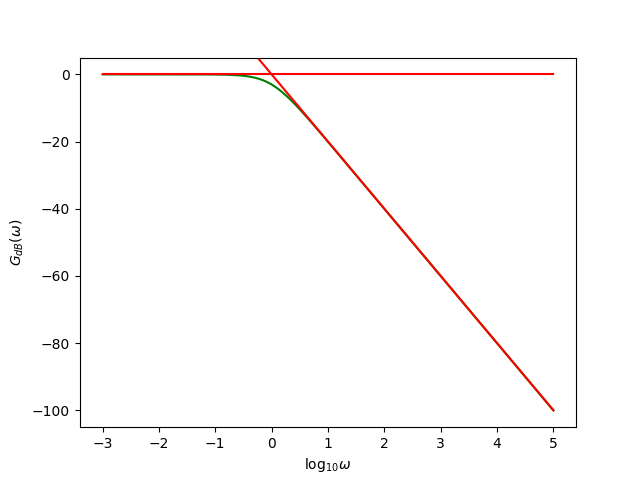

In [4]:
fh = plt.figure();
plt.plot(lwv, dbHv, c='g');  plt.ylabel('$G_{dB}(\omega)$');
plt.xlabel('$\log_{10} \omega$');
yax = plt.gca().get_ylim();

as0v = np.zeros(lwv.shape);
as1v = -20*lwv - 20*np.log10(RC);
plt.plot(lwv, as0v, 'r', lwv, as1v, 'r');
plt.gca().set_ylim(yax);

In this last plot the slope of the roll-off is seen to be 20dB for every unit increment of the x-axis $\log_{10} \omega$.  However, note that $\log_{10} \omega = 0$ corresponds to $\omega = 0$, $\log_{10} \omega = 1$ correponds to $\omega = 10$, $\log_{10} \omega = 2$ correponds to $\omega = 100$, and so on.  Thus an increase of one unit on the log frequency axis corresponds to an increase in frequency by a factor of 10.  We call a factor of 10 increase in frequency a *decade*.

Thus the first-order lowpass filter has a roll-off of 20dB per decade once above the cutoff at $\omega_c = 1/(RC)$.

We could also plot the gain in dB against $\log_2 \omega$.  Since $\log_{10} \omega = \log_2(\omega)/\log_2(10)$, once above the knee we can write
$$G_{dB}(\omega) \approx -\frac{20}{\log_2(10)} [ \log_{2} \omega] - 20 \log_{10} (RC).$$
An increase in $\log_2 \omega$ by one unit corresponds to a doubling of the frequency, called an *octave*.  We see that a one-unit increase in $\log_2$ frequency results in a reduction in gain of $20/\log_2(10) \approx 6$dB.

In other words, the first-order lowpass filter has a roll-off of 6dB per octave once above the cutoff.

# Tasks

These tasks involve writing code, or modifying existing code, to meet the objectives described.

1.  The first-order highpass filter, which has R and C swapped in the circuit given above, can be shown to have a frequency response
$$H(\omega) = \frac{j \omega RC}{1 + j \omega RC}.$$
Generate a Bode plot for this system, both magnitude and phase, for the case of $RC=1$.  The gain should be in dB, and both plots should use $\log_2 \omega$ as the independent variable.  The frequency range should extend from $\log_2 \omega = -6$ to $\log_2 \omega = 6$.  Find expressions for the two asymptotes and include them in the magnitude plot.<br><br>

2.  A second-order RLC circuit 

![](figures/circuitlrc.png)

has transfer function
$$H(\omega) = \frac{\frac{1}{RC} (j \omega)}{(j \omega)^2 + \frac{1}{RC} (j \omega) + \frac{1}{LC}}.$$
It turns out that the fundamental parameters for this circuit are the resonant frequency $\omega_0 = 1/\sqrt{LC}$ and the damping factor $\alpha = 1/(2RC)$, giving
$$H(\omega) = \frac{2 \alpha (j \omega)}{(j \omega)^2 + 2 \alpha (j \omega) + \omega_0^2}.$$
Generate a Bode plot for the system for $R=10$ and $L=C=1$.  The gain should again be expressed in dB with $\log_2 \omega$ as the independent variable, and the response should be shown for values of $\log_2 \omega$ over the range $-6$ to $6$.

You should observe a bandpass filter characteristic, where the frequency $\omega_0$ is passed with the lowest attenuation.  The quality factor for this circuit is $Q = \omega_0/(2 \alpha) = 2 \sqrt{C/L}$.  A high Q value corresponds to a system that has a very sharp resonance, or a very small bandwidth.